In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot

In [4]:
# 1. Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
# X is Sepal.Length and Y is Petal Length 
predictors_vals = np.array([predictors[0] for predictors in iris.data])
target_vals = np.array([predictors[2] for predictors in iris.data])


In [5]:
# 2.Split Data into train and test 80%-20%
x_trn, x_tst, y_trn, y_tst = train_test_split(predictors_vals, target_vals, test_size=0.2, random_state=12)
#training_idx = np.random.randint(x_vals.shape[0], size=80)
#training, test = x_vals[training_idx,:], x_vals[-training_idx,:]

In [6]:
# 3. Normalize if needed
# 4. Initialize placeholders that will contain predictors and target
predictor = tf.placeholder(shape=[None, 1], dtype=tf.float32)
target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#5. Create variables (Weight and Bias) that will be tuned up
A = tf.Variable(tf.zeros(shape=[1,1]))
b = tf.Variable(tf.ones(shape=[1,1]))


# 6. Declare model operations: Ax+b
model_output = tf.add(tf.matmul(predictor, A), b)


In [7]:
#7. Declare loss function and optimizer
#Declare loss function (L1 loss)
loss = tf.reduce_mean(tf.abs(target - model_output))
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
#my_opt = tftrain.AdamOptimizer(0.01)
train_step = my_opt.minimize(loss)

#8. Initialize variables and session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


In [8]:
#9. Fit Model by using Training Loops
# Training loop
lossArray = []
batch_size = 40
for i in range(200):
    rand_rows = np.random.randint(0, len(x_trn)-1, size=batch_size)
    batchX = np.transpose([x_trn[rand_rows]])
    batchY = np.transpose([y_trn[rand_rows]])
    sess.run(train_step, feed_dict={predictor: batchX, target: batchY})
    batchLoss = sess.run(loss, feed_dict={predictor: batchX, target: batchY})
    lossArray.append(batchLoss)
    if (i+1)%50==0:
        print('Step Number' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('L1 Loss = ' + str(batchLoss))

[slope] = sess.run(A)
[y_intercept] = sess.run(b)    

Step Number50 A = [[ 0.57237512]] b = [[ 1.0545001]]
L1 Loss = 1.05892
Step Number100 A = [[ 0.56425011]] b = [[ 1.00899959]]
L1 Loss = 1.10103
Step Number150 A = [[ 0.54742503]] b = [[ 0.96199954]]
L1 Loss = 1.21937
Step Number200 A = [[ 0.59092486]] b = [[ 0.92599958]]
L1 Loss = 1.01079


Step Number: 20 A = [[ 0.59849161]] b = [[ 0.90799969]]
L1 Loss = 1.48314
Step Number: 40 A = [[ 0.62105811]] b = [[ 0.89066637]]
L1 Loss = 1.17834
Step Number: 60 A = [[ 0.593858]] b = [[ 0.86866629]]
L1 Loss = 1.43341
Step Number: 80 A = [[ 0.61545801]] b = [[ 0.85399961]]
L1 Loss = 1.09021
Step Number: 100 A = [[ 0.66032475]] b = [[ 0.84133297]]
L1 Loss = 0.90677


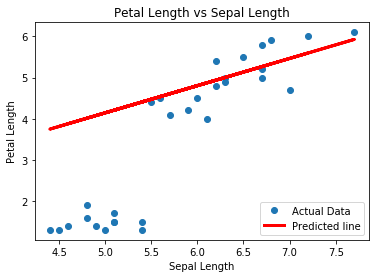

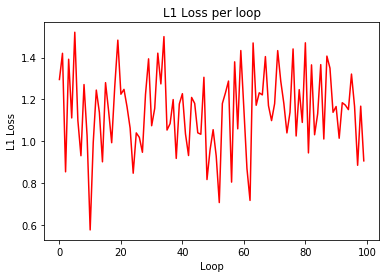

In [9]:
# 10. Check  and Display the result on test data
lossArray = []
batch_size = 30
for i in range(100):
    rand_rows = np.random.randint(0, len(x_tst)-1, size=batch_size)
    batchX = np.transpose([x_tst[rand_rows]])
    batchY = np.transpose([y_tst[rand_rows]])
    sess.run(train_step, feed_dict={predictor: batchX, target: batchY})
    batchLoss = sess.run(loss, feed_dict={predictor: batchX, target: batchY})
    lossArray.append(batchLoss)
    if (i+1)%20==0:
        print('Step Number: ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('L1 Loss = ' + str(batchLoss))        
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
# Original Data and Plot
plt.plot(x_tst, y_tst, 'o', label='Actual Data')
test_fit = []
for i in x_tst:
  test_fit.append(slope*i+y_intercept)
# predicted values and Plot
plt.plot(x_tst, test_fit, 'r-', label='Predicted line', linewidth=3)
plt.legend(loc='lower right')
plt.title('Petal Length vs Sepal Length')
plt.ylabel('Petal Length')
plt.xlabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(lossArray, 'r-')
plt.title('L1 Loss per loop')
plt.xlabel('Loop')
plt.ylabel('L1 Loss')
plt.show()
